In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
df = pd.read_csv('data/arguments-training.tsv',delimiter="\t")

<AxesSubplot: ylabel='Frequency'>

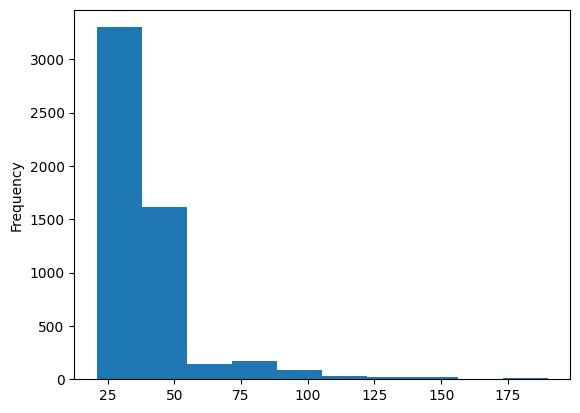

In [5]:
df['Conclusion'].str.len().plot(kind='hist')

In [13]:
np.percentile(df['Premise'].str.len(),100)

792.0

In [14]:
from transformers import AutoModel,AutoTokenizer

model = AutoModel.from_pretrained("microsoft/deberta-base")
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base")

Downloading:   0%|          | 0.00/474 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/533M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/deberta-base were not used when initializing DebertaModel: ['lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [33]:
pl = df[['Premise','Conclusion','Stance']].apply(lambda x: tokenizer(x[0]+' [SEP] '+x[1]+' [SEP] '+x[2])['input_ids'],axis=1)
# np.percentile(pl,q=100)

{'input_ids': [1, 1437, 2, 1437, 0, 1437, 0, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [42]:
model()

IndexError: tuple index out of range

In [62]:
a = torch.LongTensor(tokenizer([' [SEP] [PAD] [PAD]',])['input_ids'])
print(a.shape)
a = a.repeat([2,1,])
a.shape

torch.Size([1, 8])


torch.Size([2, 8])

torch.Size([2, 768])